In [15]:
import pandas as pd
from egoviz.models.processing import load_pickle

SEED = 42

In [16]:
data = load_pickle(r"C:\Users\adesh\Documents\GitHub\EgoVizML\data\home_data_detic_preds.pkl")
data_new = load_pickle(r"C:\Users\adesh\Documents\GitHub\EgoVizML\data\home_date_all_preds.pkl")

In [17]:
len(data), len(data_new)

(29393, 29393)

### Create a DataFrame from the dictionary

In [18]:
# create data df
df = pd.DataFrame(columns=['video', 'frame', 'classes', 'active', 'adl'])

for id, dets in data_new.items():
    adl = id.split('_', 1)[0]
    video = id.split('_')[1]
    frame = id.split('_')[2]
    classes = dets['remapped_metadata']
    active = dets['active_objects']

    row = {'video': video, 'frame': frame, 'classes': classes, 'adl': adl, 'active': active}

    df.loc[len(df)] = row

df.head()

,video,frame,classes,active,adl
0,SCI06-10--12,frame0,"[clothing_accessory, phone_tablet, other, offi...","[False, False, False, True, True, False, False...",communication-management
1,SCI06-10--12,frame147,"[phone_tablet, office_stationary, other, offic...","[False, True, False, True, False, False, False...",communication-management
2,SCI06-10--12,frame196,"[phone_tablet, phone_tablet, other, office_sta...","[False, False, False, True, False, False, Fals...",communication-management
3,SCI06-10--12,frame245,"[phone_tablet, clothing_accessory, other, offi...","[False, False, False, False, True, False, Fals...",communication-management
4,SCI06-10--12,frame294,"[phone_tablet, clothing_accessory, other, offi...","[False, False, False, True, False, False, Fals...",communication-management


In [19]:
# one hot encode the classes but add counts for each class

# create a list of all classes
all_classes = []
for classes in df['classes']:
    all_classes.extend(classes)
    
# remove duplicates
all_classes = list(set(all_classes))

# create a column for each class
for c in all_classes:
    df[c] = 0

# loop through rows and set the value of the class column to the 
# number of times it appears in the classes column
for i, row in df.iterrows():
    for c in row['classes']:
        df.at[i, c] += 1

df.head()

,video,frame,classes,active,adl,office_stationary,house_fixtures,home_appliance_tool,hat,phone_tablet,...,other,sports_equipment,wheelchair_walker,food,toiletries,animal,footwear,plant,cleaning_product,bag
0,SCI06-10--12,frame0,"[clothing_accessory, phone_tablet, other, offi...","[False, False, False, True, True, False, False...",communication-management,2,0,0,0,3,...,1,0,0,0,0,0,3,0,0,0
1,SCI06-10--12,frame147,"[phone_tablet, office_stationary, other, offic...","[False, True, False, True, False, False, False...",communication-management,3,0,0,0,2,...,1,0,0,0,0,0,3,0,0,0
2,SCI06-10--12,frame196,"[phone_tablet, phone_tablet, other, office_sta...","[False, False, False, True, False, False, Fals...",communication-management,2,0,0,0,2,...,1,0,0,0,0,0,4,0,0,0
3,SCI06-10--12,frame245,"[phone_tablet, clothing_accessory, other, offi...","[False, False, False, False, True, False, Fals...",communication-management,3,0,0,0,2,...,1,0,0,0,0,0,3,0,0,0
4,SCI06-10--12,frame294,"[phone_tablet, clothing_accessory, other, offi...","[False, False, False, True, False, False, Fals...",communication-management,3,0,0,0,2,...,1,0,0,0,0,0,3,0,0,0


In [21]:
# group by video and sum the counts for each class, drop the frame and classes columns, adl should be the same for each row in the group

df_grouped = df.groupby(['video', 'adl']).sum().reset_index()
df_grouped = df_grouped.drop(columns=['frame', 'classes'])

ValueError: operands could not be broadcast together with shapes (0,) (6,) 

In [ ]:
df_grouped

,video,adl,sports_equipment,drinkware,furnishing,home_appliance_tool,clothing_accessory,kitchen_utensils,bag,clothing,...,phone_tablet,animal,other,furniture,footwear,cleaning_product,cabinetry,food,house_fixtures,toiletries
0,SCI02-1--1,functional-mobility,0,19,8,20,0,12,4,3,...,6,2,7,10,3,12,15,51,20,1
1,SCI02-1--10,meal-preparation-cleanup,1,18,3,9,2,46,2,1,...,0,141,6,2,1,17,1,49,17,1
2,SCI02-1--11,meal-preparation-cleanup,0,7,1,7,1,60,0,0,...,0,199,2,0,0,32,0,90,17,1
3,SCI02-1--12,meal-preparation-cleanup,0,28,2,13,0,44,3,0,...,0,114,8,4,0,20,10,83,15,2
4,SCI02-1--2,meal-preparation-cleanup,0,47,1,8,10,25,1,0,...,4,3,6,2,1,18,19,95,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,SCI21-9--4,meal-preparation-cleanup,1,48,16,30,0,34,11,0,...,13,1,27,53,3,41,0,238,3,2
2257,SCI21-9--5,meal-preparation-cleanup,6,58,18,32,0,26,16,0,...,13,2,15,74,0,42,0,248,2,0
2258,SCI21-9--6,meal-preparation-cleanup,1,56,29,45,0,34,22,2,...,11,6,34,70,2,43,0,221,2,1
2259,SCI21-9--7,meal-preparation-cleanup,1,38,9,25,2,27,8,1,...,10,1,15,30,2,28,1,95,6,0


### Train a simple model to predict ADL

In [ ]:
from sklearn.model_selection import train_test_split

X = df_grouped.drop(columns=['adl', 'video'])
y = df_grouped['adl']

# split into train and test sets stratified by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

In [ ]:
# train a model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# evaluate model
from egoviz.models.evaluation import evaluate_model, evaluate_k_fold

report, cm, preds_df = evaluate_model(clf, X_test, y_test)
print(report); print(cm)

                            precision    recall  f1-score   support

  communication-management       0.89      0.98      0.93       128
       functional-mobility       0.98      0.74      0.84        62
grooming-health-management       0.94      0.63      0.76        52
           home-management       0.81      0.92      0.86       122
  leisure-other-activities       0.98      0.82      0.89        50
  meal-preparation-cleanup       0.93      0.98      0.95       188
              self-feeding       0.94      0.94      0.94        77

                  accuracy                           0.90       679
                 macro avg       0.92      0.86      0.88       679
              weighted avg       0.91      0.90      0.90       679

[[125   0   0   1   1   1   0]
 [  5  46   0   9   0   2   0]
 [  3   0  33  10   0   2   4]
 [  2   1   0 112   0   7   0]
 [  4   0   1   3  41   0   1]
 [  0   0   0   3   0 185   0]
 [  1   0   1   0   0   3  72]]


In [ ]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=SEED)
evaluate_k_fold(clf2, X, y, k=5, seed=SEED)

f1_macro: 0.8928920118908013 +/- 0.012584957136220818


,fit_time,score_time,test_f1_macro,train_f1_macro,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,model,mean_f1_macro,std_f1_macro
0,0.461114,0.028486,0.899747,1.0,0.915396,1.0,0.891481,1.0,RandomForestClassifier,0.89,0.01
1,0.439652,0.027654,0.878264,1.0,0.901755,1.0,0.866693,1.0,RandomForestClassifier,0.89,0.01
2,0.445954,0.027512,0.887165,1.0,0.915706,1.0,0.868093,1.0,RandomForestClassifier,0.89,0.01
3,0.481589,0.027587,0.885376,1.0,0.907600,1.0,0.872310,1.0,RandomForestClassifier,0.89,0.01
4,0.434162,0.027270,0.913908,1.0,0.934281,1.0,0.897867,1.0,RandomForestClassifier,0.89,0.01


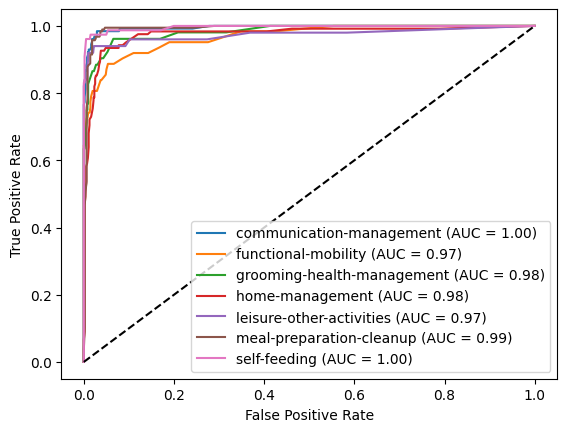

In [ ]:
# plot AUC for each class
from sklearn.metrics import roc_curve, auc
# plot
import matplotlib.pyplot as plt

def plot_auc_by_class(clf, X_test, y_test):
    # get probabilities for each class
    probs = clf.predict_proba(X_test)

    # get fpr, tpr and auc for each class
    fpr = {}
    tpr = {}
    aucs = {}

    for i, c in enumerate(clf.classes_):
        fpr[c], tpr[c], _ = roc_curve(y_test, probs[:, i], pos_label=c)
        aucs[c] = auc(fpr[c], tpr[c])



    plt.figure()
    for c in clf.classes_:
        plt.plot(fpr[c], tpr[c], label=f'{c} (AUC = {aucs[c]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

plot_auc_by_class(clf, X_test, y_test)

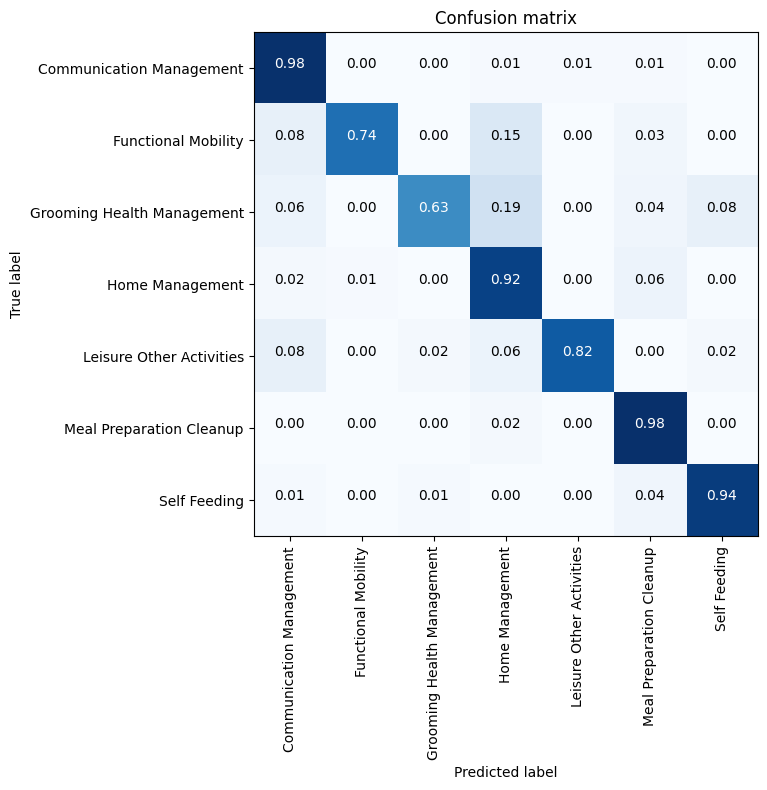

In [ ]:
# plot normalized confusion matrix using matplotlib

import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # normalize
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # plot
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    # plot classes on x and y axes

    # replace dashes with spaces and make title case
    classes = [c.replace('-', ' ').title() for c in classes]

    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    # plot values in each cell
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # plot white text if value is greater than thresh, otherwise plot black text
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    # plot labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, clf.classes_, normalize=True)

### Let's try to normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

count_col_df = df_grouped.drop(columns=['adl', 'video'])

total_counts = count_col_df.sum(axis=1)
proportions = count_col_df.div(total_counts, axis=0)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(proportions)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=count_col_df.columns, index=count_col_df.index)
normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
normalized_df = pd.concat([df_grouped[['adl', 'video']], normalized_df], axis=1)

normalized_df.head()

,adl,video,sports_equipment,drinkware,furnishing,home_appliance_tool,clothing_accessory,kitchen_utensils,bag,clothing,...,phone_tablet,animal,other,furniture,footwear,cleaning_product,cabinetry,food,house_fixtures,toiletries
0,functional-mobility,SCI02-1--1,0.000000,0.068687,0.028441,0.052278,0.000000,0.086350,0.028080,0.012002,...,0.027524,0.008733,0.023883,0.043447,0.016271,0.066866,0.111062,0.116719,0.083235,0.005332
1,meal-preparation-cleanup,SCI02-1--10,0.005816,0.039349,0.006449,0.014226,0.006571,0.200163,0.008490,0.002419,...,0.000000,0.372319,0.012379,0.005255,0.003280,0.057282,0.004477,0.067813,0.042783,0.003224
2,meal-preparation-cleanup,SCI02-1--11,0.000000,0.011907,0.001673,0.008610,0.002557,0.203157,0.000000,0.000000,...,0.000000,0.408887,0.003211,0.000000,0.000000,0.083903,0.000000,0.096920,0.033291,0.002509
3,meal-preparation-cleanup,SCI02-1--12,0.000000,0.058442,0.004105,0.019619,0.000000,0.182804,0.012159,0.000000,...,0.000000,0.287413,0.015759,0.010034,0.000000,0.064344,0.042749,0.109673,0.036043,0.006157
4,meal-preparation-cleanup,SCI02-1--2,0.000000,0.116865,0.002445,0.014383,0.037371,0.123734,0.004828,0.000000,...,0.012621,0.009010,0.014080,0.005977,0.003730,0.068986,0.096760,0.149541,0.100187,0.011001


In [ ]:
# check that the proportions add up to 1
normalized_df.drop(columns=['adl', 'video']).sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2256    1.0
2257    1.0
2258    1.0
2259    1.0
2260    1.0
Length: 2261, dtype: float64

In [ ]:
X2 = normalized_df.drop(columns=['adl', 'video'])
y2 = normalized_df['adl']

# split into train and test sets stratified by y
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=SEED)

In [ ]:
clf3 = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf3.fit(X_train, y_train)

report, cm, preds_df = evaluate_model(clf3, X_test, y_test)
print(report); print(cm)

                            precision    recall  f1-score   support

  communication-management       0.88      0.98      0.93       128
       functional-mobility       0.96      0.73      0.83        62
grooming-health-management       0.94      0.63      0.76        52
           home-management       0.83      0.89      0.86       122
  leisure-other-activities       0.98      0.84      0.90        50
  meal-preparation-cleanup       0.92      0.99      0.95       188
              self-feeding       0.91      0.95      0.93        77

                  accuracy                           0.90       679
                 macro avg       0.92      0.86      0.88       679
              weighted avg       0.91      0.90      0.90       679

[[125   0   1   0   0   1   1]
 [  7  45   0   8   0   2   0]
 [  3   1  33   9   0   2   4]
 [  4   1   0 108   1   7   1]
 [  3   0   1   3  42   0   1]
 [  0   0   0   2   0 186   0]
 [  0   0   0   0   0   4  73]]


In [ ]:
clf4 = RandomForestClassifier(n_estimators=100, random_state=SEED)
evaluate_k_fold(clf4, X2, y2, k=5, seed=SEED)

f1_macro: 0.8904658777469752 +/- 0.01664457842674177


,fit_time,score_time,test_f1_macro,train_f1_macro,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,model,mean_f1_macro,std_f1_macro
0,0.752927,0.028254,0.908393,1.0,0.922341,1.0,0.901189,1.0,RandomForestClassifier,0.89,0.02
1,0.733014,0.027635,0.873186,1.0,0.897846,1.0,0.861025,1.0,RandomForestClassifier,0.89,0.02
2,1.026319,0.032435,0.889584,1.0,0.911940,1.0,0.874257,1.0,RandomForestClassifier,0.89,0.02
3,1.023418,0.031385,0.871033,1.0,0.906158,1.0,0.848927,1.0,RandomForestClassifier,0.89,0.02
4,0.728947,0.028478,0.910134,1.0,0.932845,1.0,0.892815,1.0,RandomForestClassifier,0.89,0.02


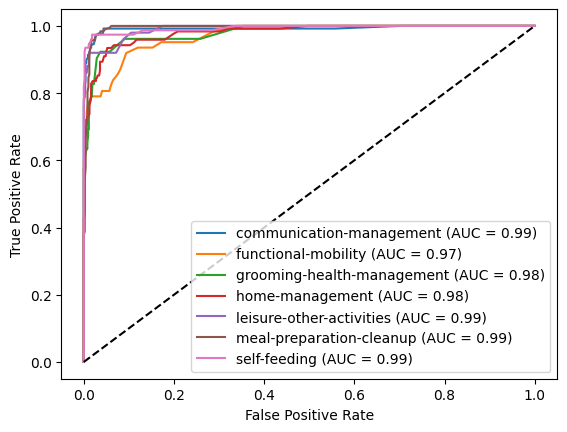

In [ ]:
plot_auc_by_class(clf3, X_test, y_test)

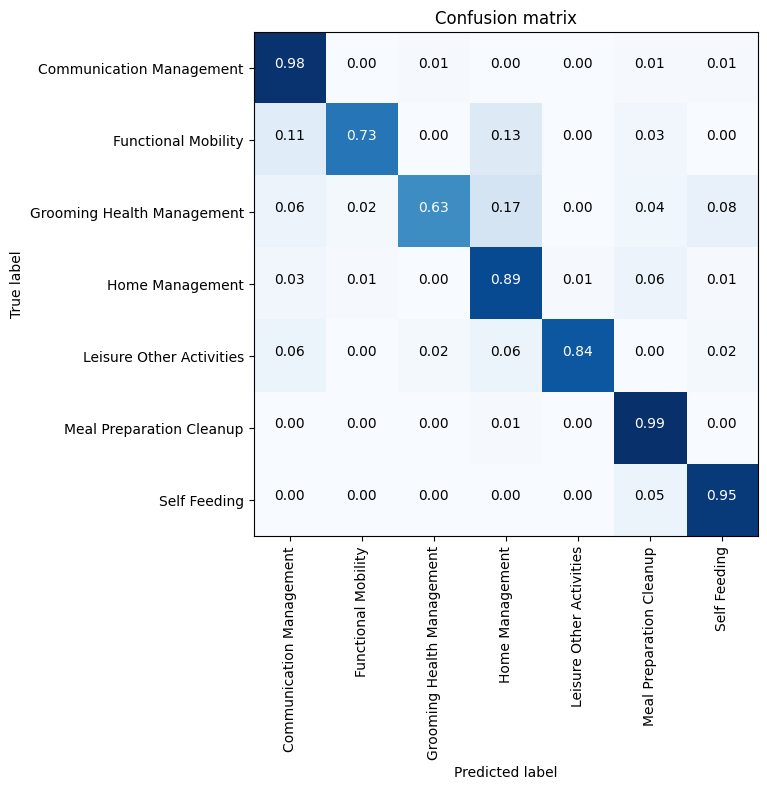

In [ ]:
plot_confusion_matrix(cm, clf3.classes_, normalize=True)

### Let's try leave one subject out cross validation

In [ ]:
df_grouped.head()

,video,adl,sports_equipment,drinkware,furnishing,home_appliance_tool,clothing_accessory,kitchen_utensils,bag,clothing,...,phone_tablet,animal,other,furniture,footwear,cleaning_product,cabinetry,food,house_fixtures,toiletries
0,SCI02-1--1,functional-mobility,0,19,8,20,0,12,4,3,...,6,2,7,10,3,12,15,51,20,1
1,SCI02-1--10,meal-preparation-cleanup,1,18,3,9,2,46,2,1,...,0,141,6,2,1,17,1,49,17,1
2,SCI02-1--11,meal-preparation-cleanup,0,7,1,7,1,60,0,0,...,0,199,2,0,0,32,0,90,17,1
3,SCI02-1--12,meal-preparation-cleanup,0,28,2,13,0,44,3,0,...,0,114,8,4,0,20,10,83,15,2
4,SCI02-1--2,meal-preparation-cleanup,0,47,1,8,10,25,1,0,...,4,3,6,2,1,18,19,95,35,3


In [ ]:
# do leave one subject out cross validation, subject is video.split('-',1)[0]

from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
import warnings

logo = LeaveOneGroupOut()

X3 = df_grouped.drop(columns=['adl', 'video'])
y3 = df_grouped['adl']

evaluation_metrics = {}

for train_index, test_index in logo.split(X3, y3, groups=df_grouped['video'].apply(lambda x: x.split('-',1)[0])):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]

    # Initialize and train the classifier
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = clf.predict(X_test)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)

    # get key as group left out
    group_left_out = df_grouped.iloc[test_index]['video'].values[0][:5]

    # save results in a dict
    evaluation_metrics[group_left_out] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

results_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
results_df = results_df.reset_index()
results_df = results_df.rename(columns={'index': 'group_left_out'})
results_df



/Users/adeshkadambi/Documents/GitHub/EgoVizML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adeshkadambi/Documents/GitHub/EgoVizML/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/adeshkadambi/Documents/GitHub/EgoVizML/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/adeshkadambi/Documents/GitHub/EgoVizML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

,group_left_out,accuracy,precision,recall,f1,mean_auc
0,SCI02,0.864583,0.456504,0.382456,0.407556,NaN
1,SCI03,0.781250,0.311966,0.367183,0.332621,NaN
2,SCI06,0.601942,0.178750,0.243074,0.195360,0.744249
3,SCI08,0.571429,0.333333,0.333333,0.333333,NaN
4,SCI10,0.142202,0.135965,0.117424,0.126016,NaN
5,SCI11,0.712121,0.260204,0.214825,0.228475,NaN
6,SCI12,0.704545,0.450602,0.523918,0.465057,0.888996
7,SCI13,0.689266,0.498747,0.384395,0.412969,NaN
8,SCI14,0.521739,0.470716,0.317997,0.355486,NaN
9,SCI15,0.882353,0.558461,0.480010,0.510895,NaN


In [ ]:
# function to drop a row from a dataframe
def drop_row(df, row):
    return df.drop(row)

# drop index 4 and 13 from df
dropped = drop_row(results_df, [4, 13])
dropped

,group_left_out,accuracy,precision,recall,f1
0,SCI02,0.864583,0.456504,0.382456,0.407556
1,SCI03,0.781250,0.311966,0.367183,0.332621
2,SCI06,0.601942,0.178750,0.243074,0.195360
3,SCI08,0.571429,0.333333,0.333333,0.333333
5,SCI11,0.712121,0.260204,0.214825,0.228475
6,SCI12,0.704545,0.450602,0.523918,0.465057
7,SCI13,0.689266,0.498747,0.384395,0.412969
8,SCI14,0.521739,0.470716,0.317997,0.355486
9,SCI15,0.882353,0.558461,0.480010,0.510895
10,SCI16,0.756098,0.513228,0.382099,0.427532


In [ ]:
# get mean accuracy, precision, recall and f1-score
results_df['mean_accuracy'] = results_df['accuracy'].mean()
results_df['mean_precision'] = results_df['precision'].mean()
results_df['mean_recall'] = results_df['recall'].mean()
results_df['mean_f1'] = results_df['f1'].mean()

results_df

,group_left_out,accuracy,precision,recall,f1,mean_accuracy,mean_precision,mean_recall,mean_f1
0,SCI02,0.864583,0.456504,0.382456,0.407556,0.643201,0.41666,0.387548,0.36565
1,SCI03,0.781250,0.311966,0.367183,0.332621,0.643201,0.41666,0.387548,0.36565
2,SCI06,0.601942,0.178750,0.243074,0.195360,0.643201,0.41666,0.387548,0.36565
3,SCI08,0.571429,0.333333,0.333333,0.333333,0.643201,0.41666,0.387548,0.36565
4,SCI10,0.142202,0.135965,0.117424,0.126016,0.643201,0.41666,0.387548,0.36565
5,SCI11,0.712121,0.260204,0.214825,0.228475,0.643201,0.41666,0.387548,0.36565
6,SCI12,0.704545,0.450602,0.523918,0.465057,0.643201,0.41666,0.387548,0.36565
7,SCI13,0.689266,0.498747,0.384395,0.412969,0.643201,0.41666,0.387548,0.36565
8,SCI14,0.521739,0.470716,0.317997,0.355486,0.643201,0.41666,0.387548,0.36565
9,SCI15,0.882353,0.558461,0.480010,0.510895,0.643201,0.41666,0.387548,0.36565
